In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Create Path
path= r'/Users/shantamaraj/Desktop/INSTACART DATA'

In [4]:
#Import last updated data
df= pd.read_pickle(os.path.join(path, 'Prepared Data', 'ords_prods_merge_4.10'))

In [6]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'updated_busiest_days', 'busiest_period_of_day', 'first_name',
       'last_name', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'family_status', 'income', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'median_days_since', 'order_frequency_flag'],
      dtype='object')

In [7]:
df.shape

(32434212, 32)

In [8]:
#2 Address any PII data in the data before continuing your analysis.
## I have decided to remove customer's first name, last name and gender from th dataframe
df= df.drop(columns=['first_name', 'last_name', 'gender'])

In [9]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'updated_busiest_days', 'busiest_period_of_day', 'state', 'age',
       'date_joined', 'n_dependants', 'family_status', 'income', 'max_order',
       'loyalty_flag', 'avg_price', 'spending_flag', 'median_days_since',
       'order_frequency_flag'],
      dtype='object')

In [11]:
#3A Create a regional segmentation of the data- create a “Region” column based on the “State” column from your customers data set.
#Regional Segmentation

#region map
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

#create a region column 

def assign_region(state):
    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else: 
        return 'Other'

df['region']= df['state'].apply(assign_region)

In [12]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'updated_busiest_days', 'busiest_period_of_day', 'state', 'age',
       'date_joined', 'n_dependants', 'family_status', 'income', 'max_order',
       'loyalty_flag', 'avg_price', 'spending_flag', 'median_days_since',
       'order_frequency_flag', 'region'],
      dtype='object')

In [15]:
#3b Is there a difference in spending habits between the different U.S. regions?
#Cross region with spending_flag and loyalty flag
pd.crosstab([df['region']], df['spending_flag'])

spending_flag,High spender,Low spender
region,,
Midwest,29344,7574466
Northeast,18735,5709612
South,40990,10760620
West,31651,8268794


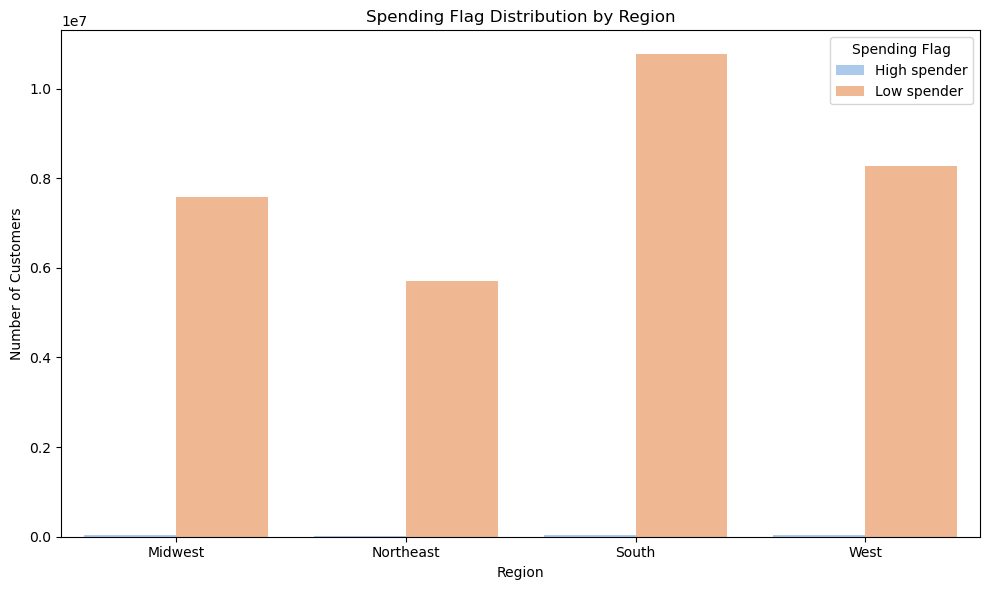

In [37]:
#create visualization for spending flag by region

# Count of spending flag by region
spending_region = df.groupby(['region', 'spending_flag']).size().reset_index(name='count')

# Plot
fig= plt.figure(figsize=(10, 6))
sns.barplot(
    data=spending_region,
    x='region',
    y='count',
    hue='spending_flag',
    palette='pastel'
)

plt.title('Spending Flag Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.legend(title='Spending Flag')
plt.tight_layout()
plt.show()

# Save image
fig.savefig(os.path.join(path, 'Visualizations', 'Spending_by_Region.png'))
plt.show()

#From the chart above, low spenders significantly outnumber high spenders across all regions. This suggests that the majority of customers, regardless of geographic location, fall into the low-spending category.

However, this visualization on its own doesn’t reveal much about customer value or behavior — it only shows overall counts. To gain deeper insights, I will examine spending flag vs. loyalty flag by region. This should highlight whether certain regions have more loyal high spenders or if the spending patterns are consistent across loyalty segments.

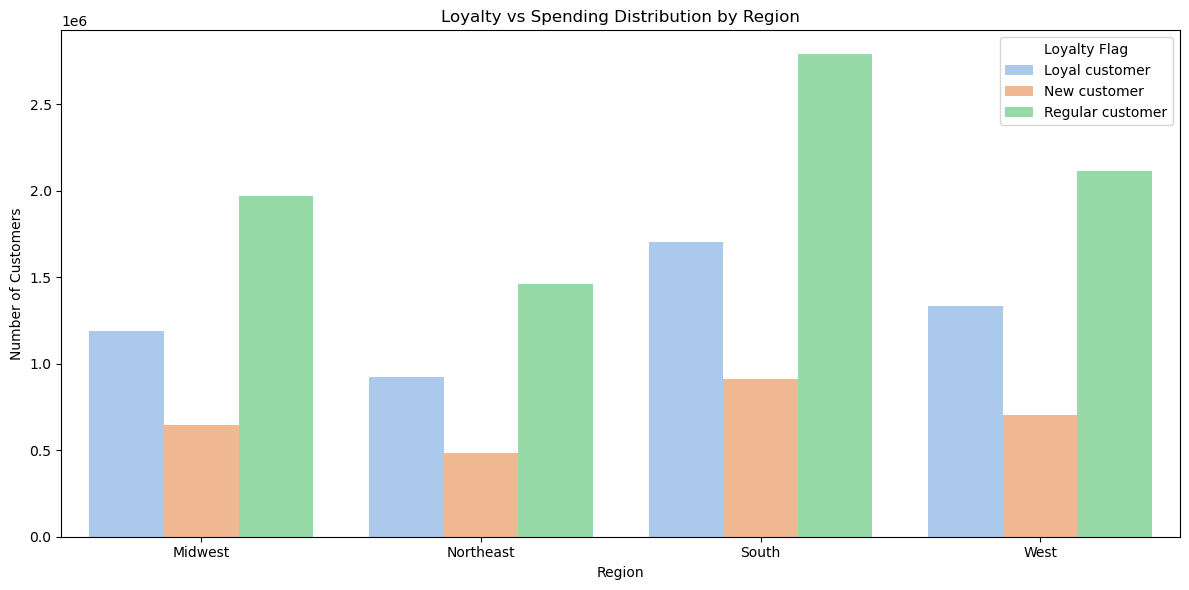

In [33]:
#create visualization for spending flag vs loyalty flag by region

combo_counts = df.groupby(['region', 'loyalty_flag', 'spending_flag']).size().reset_index(name='count')

#Plot
fig = plt.figure(figsize=(12, 6))

sns.barplot(
    data=combo_counts, 
    x='region', 
    y='count', 
    hue='loyalty_flag', 
    palette='pastel',
    errorbar=None
)

plt.title('Loyalty vs Spending Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.legend(title='Loyalty Flag')
plt.tight_layout()

# Save image
fig.savefig(os.path.join(path, 'Visualizations', 'Loyalty_vs_Spending_by_Region.png'))

plt.show()


In [38]:
#Examining loyalty and spending together reveals clearer patterns than the spending-only chart. 
#Regular customers dominate across all regions, followed by loyal customers, with new customers making up the smallest share.
#The South leads in regular customers, aligning with its high count of low spenders.
#The Midwest and West show strong regular bases with slightly more loyal than new customers.
#The Northeast has the smallest customer counts overall.
#Overall, retention is strong, but high spending isn’t concentrated among loyal customers. 

In [39]:
#4 Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data.
df.loc[df['order_number'] < 5, 'exclusion_flag'] = 'Exclude'
df.loc[df['order_number'] >= 5, 'exclusion_flag'] = 'Include'

In [40]:
#Export active sample
df.to_pickle(os.path.join(path, 'Prepared Data', 'df_active_customers_4.10.pkl'))

#5 Create customer profiles
| Profile Title               | Description                                                                 |
|----------------------------|-----------------------------------------------------------------------------|
| Young Single Budget Shopper | Under 30, no dependents, income < 80k. Likely budget-conscious and flexible. |
| Young Parent                | Under 40, 1+ dependents. Family-focused, values convenience and value.      |
| Midlife Professional        | Age 30–59, no dependents, income ≥ 80k. Likely quality-driven professionals.|
| Family Shopper              | Age 30–59, 1+ dependents. Buys for family, balances quality and value.       |
| Senior Shopper              | Age 60+, no dependents. Predictable habits, focused on essentials.          |
| Senior w/ Family Duties     | Age 60+, 1+ dependents. Shops for family or caregiving needs.               |


In [41]:
#6 Create an appropriate visualization to show the distribution of profiles.
#Age -> Income -> N_dep

def assign_profile(row):
    age = row['age']
    income = row['income']
    deps = row['n_dependants']
    
    if age < 30:
        if deps == 0:
            return 'Young Single Budget Shopper'
        else:
            return 'Young Parent'
    
    elif age < 60:
        if deps == 0 and income >= 80000:
            return 'Midlife Professional'
        elif deps > 0:
            return 'Established Family Shopper'
        else:
            return 'Young Single Budget Shopper'
    
    else:  # age >= 60
        if deps == 0:
            return 'Senior Shopper'
        else:
            return 'Senior w/ Family Duties'

# Apply the function row-wise
df['demographic_profile'] = df.apply(assign_profile, axis=1)

In [50]:
df["order_id"].nunique()

3214861

In [47]:
df.groupby('demographic_profile')['user_id'].nunique()

demographic_profile
Established Family Shopper     72567
Midlife Professional           14396
Senior Shopper                 17640
Senior w/ Family Duties        53087
Young Parent                   28953
Young Single Budget Shopper    19566
Name: user_id, dtype: int64

In [48]:
72567 + 14396 + 17640 + 53087 + 28953 + 19566

206209

In [49]:
# Total unique customers
df['user_id'].nunique()

206209

/var/folders/9x/769d711n421bxzq6p4jzg37m0000gn/T/ipykernel_25459/3377618534.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


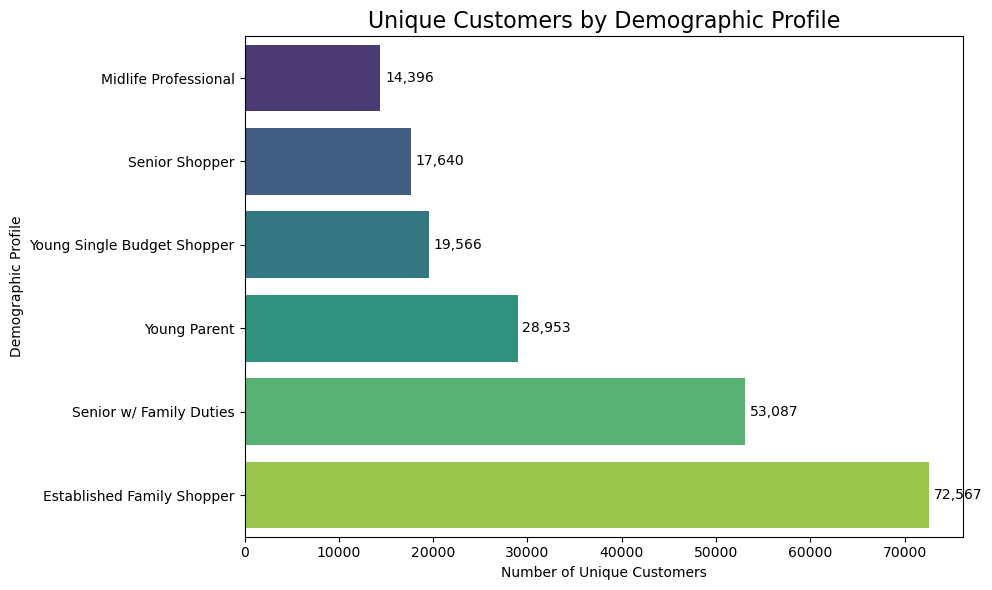

In [53]:
#6 Create an appropriate visualization to show the distribution of profiles.

# Get unique customer counts by profile
profile_counts = (
    df.groupby('demographic_profile')['user_id']
      .nunique()
      .sort_values(ascending=True)  # sort for nicer bar layout
)

# Set figure size
fig= plt.figure(figsize=(10, 6))

# Horizontal bar plot
sns.barplot(
    x=profile_counts.values,
    y=profile_counts.index,
    palette='viridis'
)

# Labels & title
plt.title('Unique Customers by Demographic Profile', fontsize=16)
plt.xlabel('Number of Unique Customers')
plt.ylabel('Demographic Profile')

# Format numbers with commas
for i, v in enumerate(profile_counts.values):
    plt.text(v + 500, i, f"{v:,}", va='center')

plt.tight_layout()

# Save image
fig.savefig(os.path.join(path, 'Visualizations', 'Unique Customers by Demographic Profile'))

plt.show()

#The profiles were assigned based on a decision tree using Age → Income → Number of Dependents. 
- **Established Family Shopper** – Largest group; high purchasing volume likely driven by multi-person households.
- **Senior w/ Family Duties** – Often shopping for family members; indicates extended family or caregiving roles.
- **Young Parent** – Strong mid-sized group; likely balancing budget and convenience in purchases.
- **Young Single Budget Shopper** – Price-sensitive; smaller basket sizes and selective purchasing patterns.
- **Senior Shopper** – Independent seniors; may prioritize specific products over large baskets.
- **Midlife Professional** – Smallest group; possibly time-constrained, shopping less frequently or in bulk.

In [60]:
#7 Aggregate max, mean, min for order_number (usage frequency) and prices (expenditure)
profile_agg = df.groupby('demographic_profile').agg({
    'order_number': ['max', 'mean', 'min'],
    'prices': ['max', 'mean', 'min']})

profile_agg

order_number                prices               
                                     max       mean min    max      mean  min
demographic_profile                                                          
Established Family Shopper            99  17.111369   1   25.0  7.796295  1.0
Midlife Professional                  99  17.359277   1   25.0  7.967323  1.0
Senior Shopper                        99  17.275139   1   25.0  7.805965  1.0
Senior w/ Family Duties               99  17.061341   1   25.0  7.798061  1.0
Young Parent                          99  17.147126   1   25.0  7.791386  1.0
Young Single Budget Shopper           99  17.174941   1   25.0  7.639016  1.0

In [63]:
#8 Compare your customer profiles with regions and departments. Can you identify a link between them?# 
region_profile_ct = pd.crosstab(df['demographic_profile'], df['region'], normalize='index') * 100

region_profile_ct

region,Midwest,Northeast,South,West
demographic_profile,,,,
Established Family Shopper,23.556751,17.825286,33.128730,25.489232
Midlife Professional,24.350795,16.729260,32.656783,26.263162
Senior Shopper,23.317924,18.077816,33.217946,25.386314
Senior w/ Family Duties,23.180338,17.746578,33.330045,25.743039
Young Parent,23.490832,17.355217,33.583324,25.570627
Young Single Budget Shopper,23.035003,17.639951,34.098487,25.226560


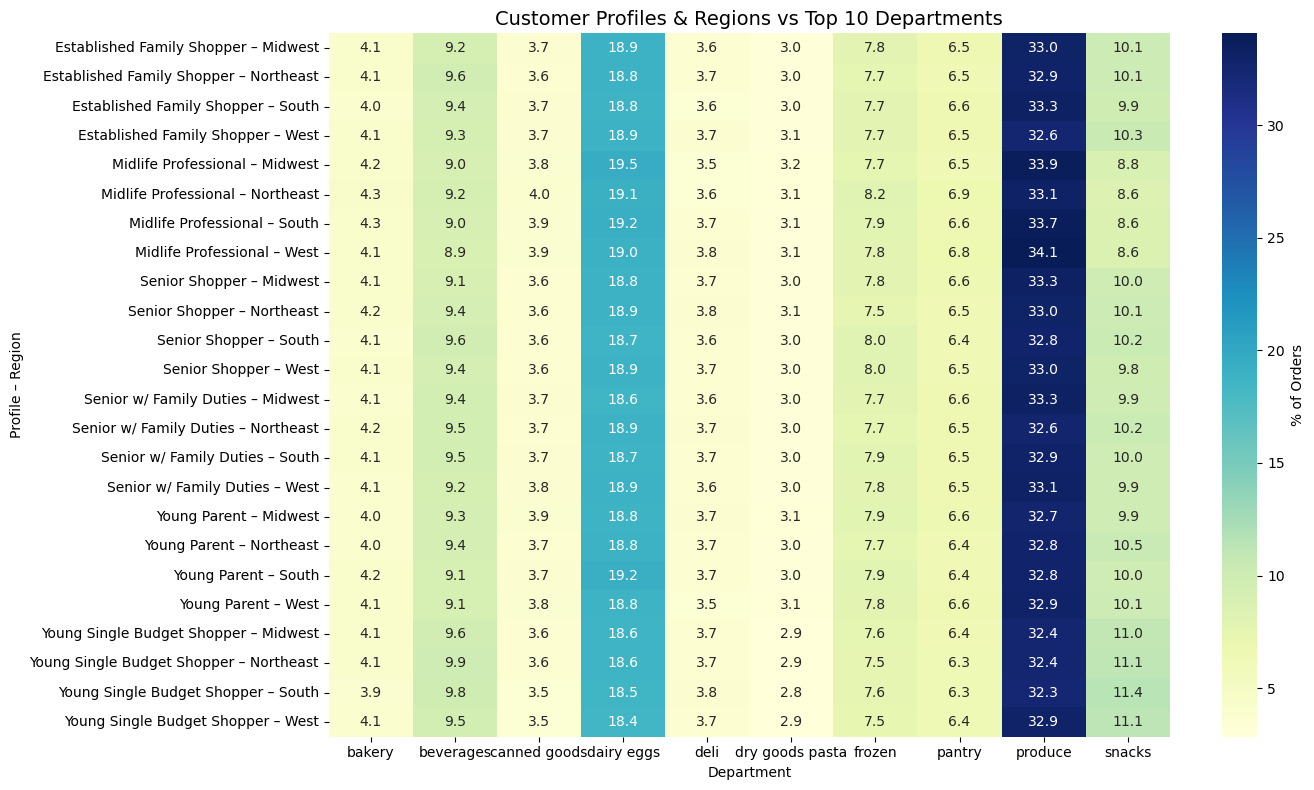

In [81]:
#1 Get top 10 departments by total orders
top_depts = (
    df['department_id']
    .value_counts()
    .head(10)
    .index
)
df_top = df[df['department_id'].isin(top_depts)]

#2 Merge with department names
dept_names= pd.read_csv(os.path.join(path, 'Prepared Data', 'departments_wrangled.csv'))                        
df_top = df_top.merge(dept_names, on='department_id', how='left')

#3 Combine profile & region into one column for labeling
df_top['profile_region'] = df_top['demographic_profile'] + ' – ' + df_top['region']

#4 Crosstab: Profile+Region vs Department (% of orders)
crosstab = pd.crosstab(
    index=df_top['profile_region'],
    columns=df_top['department'],
    normalize='index'
) * 100

#5 Heatmap
fig= plt.figure(figsize=(14,8))
sns.heatmap(
    crosstab,
    cmap='YlGnBu',
    annot=True,
    fmt=".1f",
    cbar_kws={'label': '% of Orders'}
)

plt.title('Customer Profiles & Regions vs Top 10 Departments', fontsize=14)
plt.xlabel('Department')
plt.ylabel('Profile – Region')
plt.tight_layout()


fig.savefig(os.path.join(path, 'Visualizations', 'Customer Profiles & Regions vs Top 10 Departments'))
plt.show()

#The heatmap reveals that Produce is the dominant category across all customer profiles and regions, accounting for roughly 32–34% of orders. Dairy & Eggs follows as the second most purchased category (~18–20%), showing consistent importance regardless of profile or geography. Mid-range categories such as Beverages and Snacks contribute around 9–11% of orders, with minimal regional or demographic variation. Lower-share categories like Deli and Dry Goods Pasta remain consistently under 5%. Overall, this suggests that shopping behavior in terms of category preference is remarkably stable across both demographic profiles and regions, with core staples driving the majority of purchases.



In [82]:
#Save and export to prepared data
df.to_pickle(os.path.join(path, 'Prepared Data', 'orders_products_all'))

/var/folders/9x/769d711n421bxzq6p4jzg37m0000gn/T/ipykernel_49150/1396509051.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='price_range_loc', order=df['price_range_loc'].value_counts().index, palette='viridis')


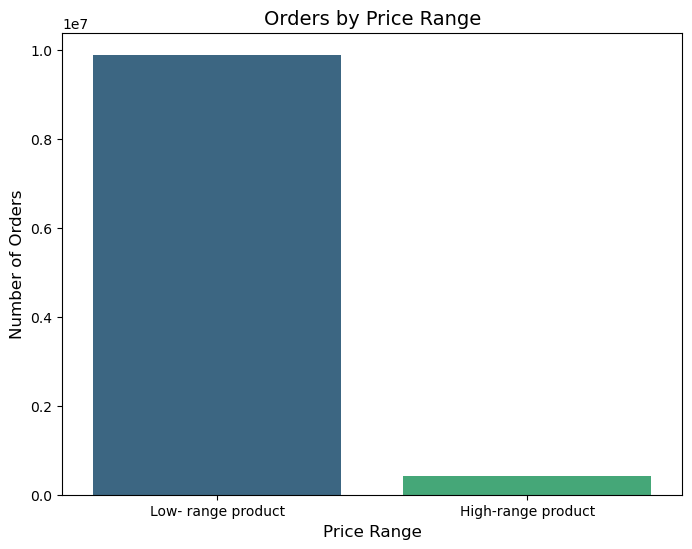

Chart saved to: /Users/shantamaraj/Desktop/INSTACART DATA/Visualizations/orders_by_price_range.png


In [5]:
# Countplot for price range
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='price_range_loc', order=df['price_range_loc'].value_counts().index, palette='viridis')

plt.title('Orders by Price Range', fontsize=14)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

# Save figure
save_path = os.path.join(path, 'Visualizations', 'orders_by_price_range.png')
plt.savefig(save_path, bbox_inches='tight')

plt.show()

print(f"Chart saved to: {save_path}")

In [7]:
df["price_range_loc"].value_counts()

price_range_loc
Low- range product    9900480
High-range product     417682
Name: count, dtype: int64

In [10]:
df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'
df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product'
df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [11]:
df["price_range_loc"].value_counts()

price_range_loc
Mid-range product     21890146
Low-range product     10126384
High-range product      417682
Name: count, dtype: int64

/var/folders/9x/769d711n421bxzq6p4jzg37m0000gn/T/ipykernel_49150/1396509051.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='price_range_loc', order=df['price_range_loc'].value_counts().index, palette='viridis')


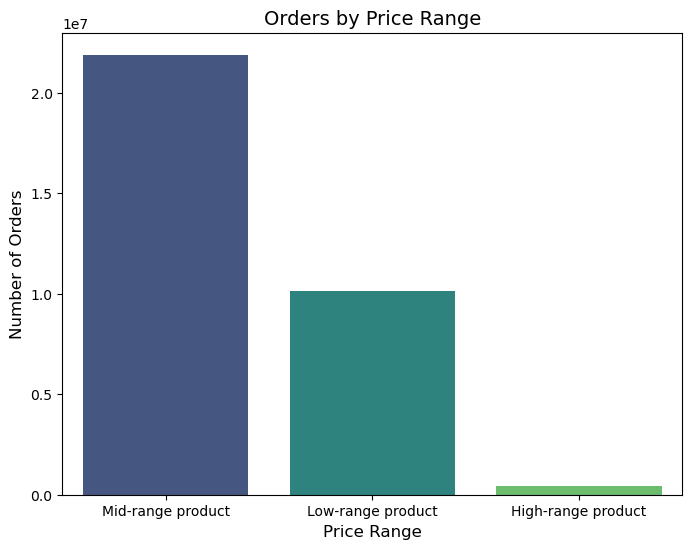

Chart saved to: /Users/shantamaraj/Desktop/INSTACART DATA/Visualizations/orders_by_price_range.png


In [12]:
# Countplot for price range
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='price_range_loc', order=df['price_range_loc'].value_counts().index, palette='viridis')

plt.title('Orders by Price Range', fontsize=14)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

# Save figure
save_path = os.path.join(path, 'Visualizations', 'orders_by_price_range.png')
plt.savefig(save_path, bbox_inches='tight')

plt.show()

print(f"Chart saved to: {save_path}")

/var/folders/9x/769d711n421bxzq6p4jzg37m0000gn/T/ipykernel_49150/4098466241.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loyalty_stats, x='loyalty_flag', y='avg_price', ax=axes[0], palette='viridis')
/var/folders/9x/769d711n421bxzq6p4jzg37m0000gn/T/ipykernel_49150/4098466241.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loyalty_stats, x='loyalty_flag', y='median_days_since', ax=axes[1], palette='viridis')


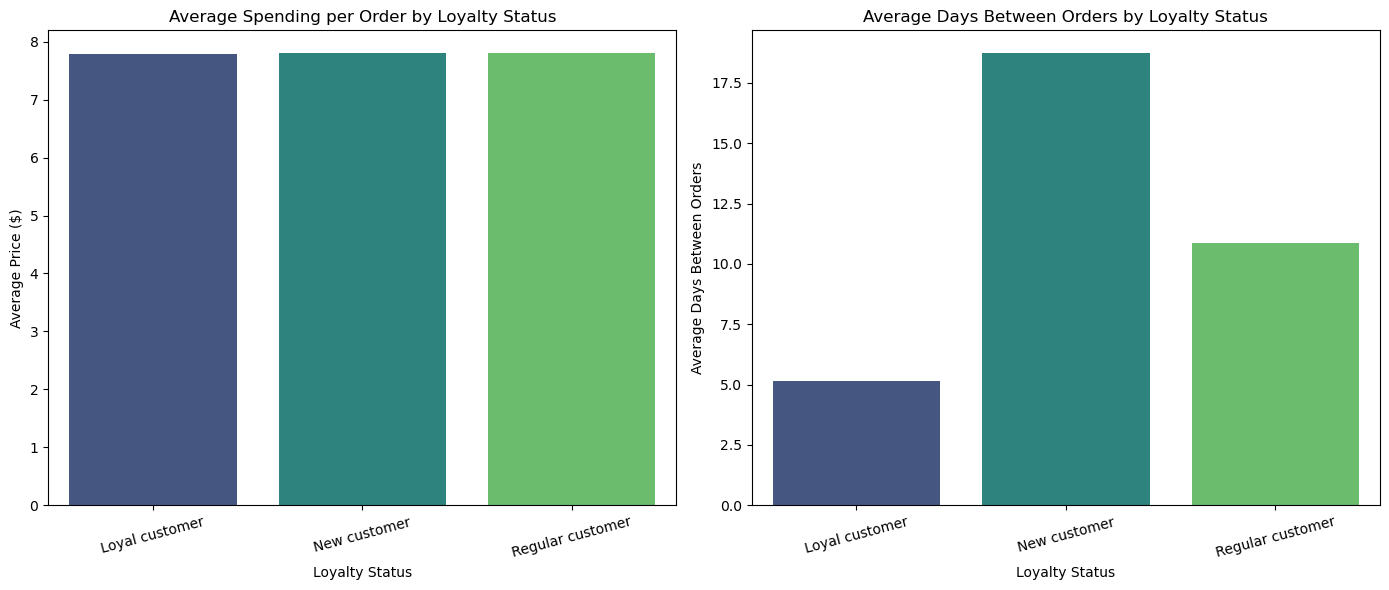

In [20]:
# Calculate average spending and average order frequency by loyalty status
loyalty_stats = df.groupby('loyalty_flag').agg({
    'avg_price': 'mean',
    'median_days_since': 'mean'
}).reset_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Chart 1 - Average Spending per Order
sns.barplot(data=loyalty_stats, x='loyalty_flag', y='avg_price', ax=axes[0], palette='viridis')
axes[0].set_title('Average Spending per Order by Loyalty Status')
axes[0].set_xlabel('Loyalty Status')
axes[0].set_ylabel('Average Price ($)')
axes[0].tick_params(axis='x', rotation=15)

# Chart 2 - Average Days Between Orders
sns.barplot(data=loyalty_stats, x='loyalty_flag', y='median_days_since', ax=axes[1], palette='viridis')
axes[1].set_title('Average Days Between Orders by Loyalty Status')
axes[1].set_xlabel('Loyalty Status')
axes[1].set_ylabel('Average Days Between Orders')
axes[1].tick_params(axis='x', rotation=15)

plt.tight_layout()

In [22]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'updated_busiest_days', 'busiest_period_of_day', 'first_name',
       'last_name', 'gender', 'state', 'age', 'date_joined', 'n_dependants',
       'family_status', 'income', 'max_order', 'loyalty_flag', 'avg_price',
       'spending_flag', 'median_days_since', 'order_frequency_flag'],
      dtype='object')

In [24]:
df[region]

NameError: name 'region' is not defined

In [25]:
#3A Create a regional segmentation of the data- create a “Region” column based on the “State” column from your customers data set.
#Regional Segmentation

#region map
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

#create a region column 

def assign_region(state):
    if state in northeast:
        return 'Northeast'
    elif state in midwest:
        return 'Midwest'
    elif state in south:
        return 'South'
    elif state in west:
        return 'West'
    else: 
        return 'Other'

df['region']= df['state'].apply(assign_region)

/var/folders/9x/769d711n421bxzq6p4jzg37m0000gn/T/ipykernel_49150/100795992.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/9x/769d711n421bxzq6p4jzg37m0000gn/T/ipykernel_49150/100795992.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


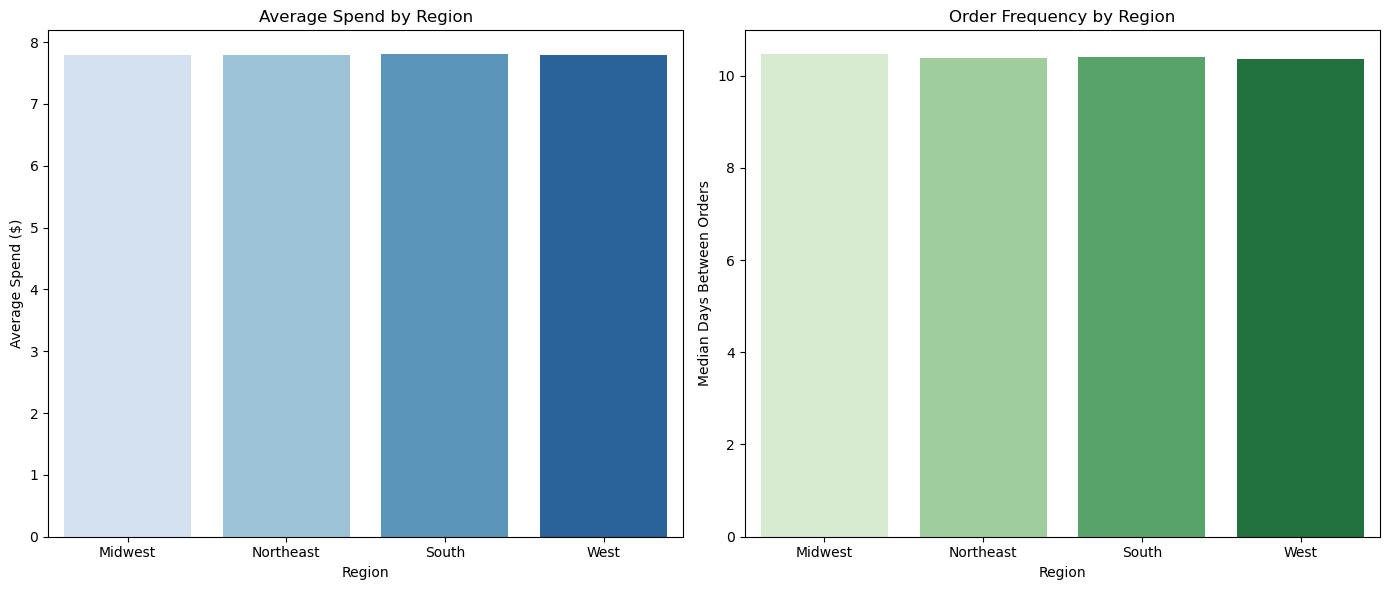

Visualization saved to: /Users/shantamaraj/Desktop/INSTACART DATA/Visualizations/Ordering_Habits_by_Region.png


In [26]:
# Group data by region
region_stats = df.groupby('region').agg(
    avg_spend=('avg_price', 'mean'),
    median_days_between_orders=('median_days_since', 'mean')
).reset_index()

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Average Spend by Region
sns.barplot(
    data=region_stats,
    x='region',
    y='avg_spend',
    palette='Blues',
    ax=axes[0]
)
axes[0].set_title('Average Spend by Region')
axes[0].set_ylabel('Average Spend ($)')
axes[0].set_xlabel('Region')

# Plot Median Days Between Orders by Region
sns.barplot(
    data=region_stats,
    x='region',
    y='median_days_between_orders',
    palette='Greens',
    ax=axes[1]
)
axes[1].set_title('Order Frequency by Region')
axes[1].set_ylabel('Median Days Between Orders')
axes[1].set_xlabel('Region')

plt.tight_layout()

# Save to Visualizations folder
save_path = os.path.join(path, 'Visualizations', 'Ordering_Habits_by_Region.png')
plt.savefig(save_path)
plt.show()

print(f"Visualization saved to: {save_path}")